This dataset provides detailed information on international trade transactions, capturing both import and export activities. It includes comprehensive data on various aspects of trade, making it a valuable resource for business analysis, economic research, and financial modeling.


This is the dataset of the trades of some countries. These are the columns in the dataset:

- Transaction_ID: A unique identifier for each transaction.  

- Country: The country involved in the transaction.   

- Product: The product being transacted.   

- Import_Export: Whether the transaction is an import or export.   

- Quantity: The number of units involved in the transaction.   

- Value: The monetary value of the transaction.  

- Date: The date the transaction took place.  

- Category: The category of the product. 

- Port: The port through which the transaction occurred. 

- Customs_Code: A code used for customs purposes.  

- Weight: The weight of the goods involved.  

- Shipping_Method: The method used for shipping the goods- .g., air, sea).  

 - Supplier: The company or individual supplying the product.  

- Customer: The company or individual eceiving the product.  

 - Invoice_Number: The invoice numer for the transaction.  

 - Payment_Terms: The terms of payment agreed upon for the transaction. reed upon for the transaction. 

In [18]:
#iporting the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import t

In [19]:
# Define File Path and Import & Read Dataset
ds = pd.read_csv(r"C:\Users\Sweta Behera\OneDrive\MBA\MBA\FORE\SUBJECT MATERIAL\TERM 1\Python\python term project\Imports_Exports_Dataset.csv")

# Display Dataset Information
ds.head(2)

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,1979,9506.57,07-12-2023,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,5763,7100.91,04-04-2023,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid


In [20]:
ds.describe()

,Quantity,Value,Customs_Code,Weight,Invoice_Number
count,15000.000000,15000.000000,15000.00000,15000.000000,1.500000e+04
mean,4980.554733,5032.931120,549507.95920,2492.118859,5.020677e+07
std,2866.166690,2857.593897,260886.91886,1451.378507,2.889888e+07
min,1.000000,102.120000,100041.00000,0.570000,4.202600e+04
25%,2517.000000,2552.750000,325635.50000,1243.482500,2.527742e+07
50%,4958.500000,5045.705000,545432.00000,2476.135000,5.026745e+07
75%,7458.250000,7504.700000,777988.00000,3747.392500,7.510045e+07
max,10000.000000,9999.130000,999964.00000,4999.930000,9.999799e+07


In [21]:
#  Identify & Display the List of following Variables:
# a) Index Variables: Transaction_ID
# b) Non-Categorical Variables: Quantity, Value, Date, Weight
# c) Categorical Variables - Nominal Type: Country, Product, Import_Export, Category, Port, Customs_Code, Shipping_Method, Supplier, Customer, Invoice_Number, Payment_Terms
# d) Categorical Variables - Ordinal Type: None

In [22]:
#taking a sample out of the population
sdset = ds.sample(n = 2001, random_state = 451)
sdset.head(2)

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
4886,817fb15d-ca6b-49aa-89ad-4a03c465780b,Iraq,sing,Import,1713,9297.90,19-01-2020,Clothing,North Josephbury,554491,3904.08,Air,"Hernandez, Fowler and Jimenez",Destiny Juarez,8481088,Prepaid
1108,3e5aed83-5272-4246-a57e-a412a2157489,Colombia,data,Export,3419,3961.62,24-11-2021,Toys,Milesberg,868846,3275.97,Land,"Hughes, Sanchez and Love",Dylan Butler,17071361,Net 30


In [23]:
sdset.shape

(2001, 16)

In [24]:
sdset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, 4886 to 6676
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   2001 non-null   object 
 1   Country          2001 non-null   object 
 2   Product          2001 non-null   object 
 3   Import_Export    2001 non-null   object 
 4   Quantity         2001 non-null   int64  
 5   Value            2001 non-null   float64
 6   Date             2001 non-null   object 
 7   Category         2001 non-null   object 
 8   Port             2001 non-null   object 
 9   Customs_Code     2001 non-null   int64  
 10  Weight           2001 non-null   float64
 11  Shipping_Method  2001 non-null   object 
 12  Supplier         2001 non-null   object 
 13  Customer         2001 non-null   object 
 14  Invoice_Number   2001 non-null   int64  
 15  Payment_Terms    2001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 265.8+ KB


In [25]:
#subsetting the non categorical variables
ncat = sdset[['Quantity', 'Value', 'Date', 'Weight']]

# displaying the descriptive statistics of the non categoriial data
ncat.describe()

,Quantity,Value,Weight
count,2001.000000,2001.000000,2001.000000
mean,5099.781609,5063.148821,2455.294468
std,2891.315465,2885.191335,1440.260862
min,15.000000,104.490000,2.860000
25%,2619.000000,2518.810000,1222.690000
50%,5116.000000,5090.180000,2387.170000
75%,7570.000000,7590.740000,3687.180000
max,9995.000000,9996.090000,4994.900000


In [26]:
# taking out the numeric columns in the sample dataset
numeric_columns = sdset.select_dtypes(include='number')  

# Calculate the range for each numeric column
range_values = numeric_columns.max() - numeric_columns.min()

# Display the range for each column
print(range_values)

Quantity              9980.00
Value                 9891.60
Customs_Code        899782.00
Weight                4992.04
Invoice_Number    99917238.00
dtype: float64


In [27]:
# taking out the numeric columns in the sample dataset
numeric_columns = sdset.select_dtypes(include='number')  

# Calculate the kurtosis for each numeric column
kurtosis_values = numeric_columns.kurt()

# Display the kurtosis for each column
print(kurtosis_values)

Quantity         -1.179727
Value            -1.215675
Customs_Code     -1.215470
Weight           -1.185340
Invoice_Number   -1.187008
dtype: float64


In [28]:
# Select relevant columns for correlation analysis
selected_columns = ['Quantity', 'Value', 'Weight']

# Create a subset DataFrame with selected columns
correlation_data = sdset[selected_columns]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

correlation_matrix

,Quantity,Value,Weight
Quantity,1.0000,-0.027600,0.001600
Value,-0.0276,1.000000,0.036888
Weight,0.0016,0.036888,1.000000


In [29]:
sdset.columns

Index(['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Quantity',
       'Value', 'Date', 'Category', 'Port', 'Customs_Code', 'Weight',
       'Shipping_Method', 'Supplier', 'Customer', 'Invoice_Number',
       'Payment_Terms'],
      dtype='object')

In [30]:
#subseting the categorical data 
cat = sdset[['Country', 'Product', 'Import_Export', 'Category', 'Port', 'Customs_Code' , 'Shipping_Method', 'Supplier', 'Customer', 'Invoice_Number', 'Payment_Terms']]

#displaying the descriptive statistics of the country variable
ccat = cat.groupby('Country').count()



In [31]:
#counting in the number of country in ranking
vcount = cat["Country"].value_counts()

#displaying the maximum and minimum values and the ranking
vcount.head(1), vcount.tail(1), vcount

(Country
 Suriname    19
 Name: count, dtype: int64,
 Country
 Taiwan    2
 Name: count, dtype: int64,
 Country
 Suriname      19
 Congo         18
 Bolivia       16
 Korea         15
 Serbia        15
               ..
 Bangladesh     3
 Kiribati       2
 Swaziland      2
 Samoa          2
 Taiwan         2
 Name: count, Length: 243, dtype: int64)

In [32]:
#calculating the coefficient of variance 

# Select numeric columns
numeric_columns = sdset[["Quantity", "Value", "Weight"]]

# Calculate the coefficient of variation (CV) for each numeric column
cv_values = (numeric_columns.std() / numeric_columns.mean()) * 100

# Display the CV for each numeric column
print(cv_values)


Quantity    56.694888
Value       56.984131
Weight      58.659394
dtype: float64


In [241]:
#calculating the confidence interval of value variable at 95% confidence level

#describing the values
N = len(sdset)
population_mean = 5032.931120
population_sd = 2857.593897
confidence_level = 0.95

#calculating the lower and upper bound values for the Confidence interval
s_error = population_sd/(N**0.5)
zscore = norm.ppf((1+confidence_level)/2)
margin_of_error = s_error*zscore
lower_bound_value = population_mean - margin_of_error
upper_bound_value = population_mean + margin_of_error

CI = np.array([lower_bound_value,upper_bound_value]).round(2)

#displaying the Confidence interval of Value variable with 95% confidence level

CI

array([4907.73, 5158.14])

This narrow range of Confidence Interval suggests that transaction values are relatively stable, implying low variability in revenue per transaction. Management can rely on this stability for accurate financial planning and forecasting, with minimal risk of significant fluctuations in average transaction value.

Asking relevant questions about the data set to get some basic insights:

In [36]:
# Q1. Which country has the highest and lowest number of transactions (both imports and exports)?
# Count the number of transactions per country
transaction_counts = sdset['Country'].value_counts()
highest_country = transaction_counts.idxmax()
lowest_country = transaction_counts.idxmin()

print(f"Highest number of transactions: {highest_country}")
print(f"Lowest number of transactions: {lowest_country}")



Highest number of transactions: Suriname
Lowest number of transactions: Kiribati


Q1 Analysis:
Suriname has the highest number of transactions, both in terms of imports and exports.
Kiribati has the lowest number of transactions in both imports and exports.
Suriname's Active Trade: With Suriname showing the highest transaction volume, there might be an opportunity to study what specific products or categories are being traded. It could reflect a diverse range of exports or imports, or it might focus on a few high-demand commodities.
Kiribati's Limited Trade: Kiribati’s low transaction volume could highlight a need for infrastructure improvements or economic diversification to increase trade. The country’s low trade volume might also point to its self-sufficiency or reliance on specific trade routes and partners.

In [38]:
#Q2. What is the average value of transactions by product and country?
# Calculate the average value of transactions by product and country
average_value = sdset.groupby(['Product', 'Country'])['Value'].mean()

print(average_value)



Product   Country                    
American  Cape Verde                     2442.68
          French Southern Territories    3744.54
Congress  Equatorial Guinea              6631.68
          Tunisia                        4513.46
Democrat  Djibouti                       8783.15
                                          ...   
young     Spain                          1244.61
your      Guernsey                       3760.42
          Kazakhstan                     9401.38
yourself  Czech Republic                 7870.86
          Equatorial Guinea              2128.33
Name: Value, Length: 1988, dtype: float64


Q2 Analysis:
This gives a clear insight into how different products perform in various countries. This data would give an idea about implications like figuring out country-specific product demand, understanding market behavior and potential opportunities for untapped market growth.

In [40]:
#Q3. #Which country contributes the most to total transaction value?
# Calculate the total transaction value per country
total_value_by_country = sdset.groupby('Country')['Value'].sum()
highest_value_country = total_value_by_country.idxmax()

print(f"Country contributing the most to total transaction value: {highest_value_country}")



Country contributing the most to total transaction value: Suriname


Q3 Analysis:
The analysis reveals that Suriname contributes the most to the total transaction value across all countries in the dataset. This suggests that Suriname is a significant player in terms of the overall monetary value of transactions, either through the volume of transactions, high-value transactions, or both.

In [42]:
#Q4.  What is the average weight of shipments per country?
# Calculate the average weight of shipments per country
average_weight_by_country = sdset.groupby('Country')['Weight'].mean()

print(average_weight_by_country)

Country
Afghanistan          2388.235000
Albania              2808.017000
Algeria              2741.365455
American Samoa       2919.584545
Andorra              2010.600000
                        ...     
Wallis and Futuna    2751.380000
Western Sahara       2985.133750
Yemen                4457.202000
Zambia               2497.490833
Zimbabwe             3072.767500
Name: Weight, Length: 243, dtype: float64


Q4 Analysis:
The average weight of shipments per country varies significantly, highlighting differences in the scale or type of goods traded across regions. For instance, Yemen has one of the highest average shipment weights at 4457.20, indicating its involvement in heavy or bulk goods trade. On the other hand, countries like Andorra have lower average shipment weights (2010.60), which could suggest smaller-scale or more specialized shipments.

In [44]:
#Q5. Which product category contributes the most to total transaction value (both imports and exports)?
# Calculate the total transaction value per product category
total_value_by_category = sdset.groupby('Category')['Value'].sum()
highest_value_category = total_value_by_category.idxmax()

print(f"Product category contributing the most to total transaction value: {highest_value_category}")



Product category contributing the most to total transaction value: Electronics


Q5 Analysis:
The product category contributing the most to total transaction value is Electronics. This indicates that electronics, encompassing a wide range of high-demand products suggests that electronics play a critical role in both import and export markets, driving substantial revenue across countries.

In [46]:
#Q6. Which products are most frequently exported and imported by value and quantity?
# Calculate the total quantity and value of exports and imports by product
product_summary = sdset.groupby(['Product', 'Import_Export'])[['Quantity', 'Value']].sum()

print(product_summary)


                        Quantity     Value
Product  Import_Export                    
American Import             5341   6187.22
Congress Export            10673  11145.14
Democrat Import            20330  15464.45
Mr       Export            19497   8590.29
         Import             6729   3249.37
...                          ...       ...
young    Export            12902  13574.02
         Import            11792  14974.91
your     Import             1935  13161.80
yourself Export             1864   7870.86
         Import             6842   2128.33

[1239 rows x 2 columns]


Q6 Analysis:
The product summary reveals which products dominate in exports and imports by both quantity and value. For instance, Congress is a leading export product with a total quantity of 10,673 and a value of 11,145.14, while Democrat is a significant import with a quantity of 20,330 and a value of 15,464.45. These trends provide insights into key product flows in international trade.

In [48]:
#Q7. Which country has the highest number of import transactions, and which has the highest number of export transactions?
# Count the number of import and export transactions per country
import_counts = sdset[sdset['Import_Export'] == 'Import']['Country'].value_counts()
export_counts = sdset[sdset['Import_Export'] == 'Export']['Country'].value_counts()

highest_import_country = import_counts.idxmax()
highest_export_country = export_counts.idxmax()

print(f"Country with highest number of import transactions: {highest_import_country}")
print(f"Country with highest number of export transactions: {highest_export_country}")

Country with highest number of import transactions: Suriname
Country with highest number of export transactions: Bolivia


Q7 Analysis:
The data indicates that Suriname has the highest number of import transactions, signifying its substantial role in receiving goods. On the other hand, Bolivia leads in export transactions, making it a key player in sending goods abroad. This contrast highlights the distinct roles these countries play in the global trade network, with Suriname focusing on imports and Bolivia on exports.

In [50]:
#Q8. How does the total value of imports compare to the total value of exports globally?
# Calculate the total value of imports and exports globally
total_value_imports = sdset[sdset['Import_Export'] == 'Import']['Value'].sum()
total_value_exports = sdset[sdset['Import_Export'] == 'Export']['Value'].sum()

print(f"Total value of imports: {total_value_imports}")
print(f"Total value of exports: {total_value_exports}")


Total value of imports: 5273220.279999999
Total value of exports: 4858140.510000001


Q8 Analysis:
Globally, the total value of imports is approximately 5,273,220, while the total value of exports is slightly lower at 4,858,140. This indicates that the global trade balance leans towards imports, with countries collectively importing more in terms of monetary value than they are exporting. This could reflect increased demand for foreign goods or a reliance on external resources in various regions. The difference, while not drastically large, suggests a potential trade deficit on a global scale.

In [52]:
#Q9. Which port handles the largest number of transactions, and what types of products are typically processed there?
# Count the number of transactions per port
port_transaction_counts = sdset['Port'].value_counts()
largest_port = port_transaction_counts.idxmax()

# What types of products are typically processed at the largest port?
products_at_largest_port = sdset[sdset['Port'] == largest_port]['Category'].value_counts()

print(f"Largest port: {largest_port}")
print(products_at_largest_port)


Largest port: South David
Category
Toys         2
Clothing     1
Furniture    1
Name: count, dtype: int64


Q9 Analysis:
The South David port handles the largest number of transactions. The primary types of products processed at this port include Toys, Clothing, and Furniture, with Toys being the most frequently traded product. This suggests that South David is a key port for consumer goods, particularly those related to lifestyle and household products. The variety of products indicates that the port likely serves multiple industries, though it seems to specialize in products that are relatively light and require quick turnover.
Understanding the product types processed at this port can help logistics planners and businesses optimize their supply chain strategies, especially if they are dealing with similar categories.

In [54]:
#Q10. Which shipping method is most commonly used for high-value or high-weight shipments?
# Define high value and high weight thresholds
high_value_threshold = sdset['Value'].quantile(0.75)
high_weight_threshold = sdset['Weight'].quantile(0.75)

# Filter high-value and high-weight shipments
high_value_shipments = sdset[sdset['Value'] >= high_value_threshold]
high_weight_shipments = sdset[sdset['Weight'] >= high_weight_threshold]

# Calculate the most common shipping method for high-value and high-weight shipments
most_common_method_value = high_value_shipments['Shipping_Method'].value_counts().idxmax()
most_common_method_weight = high_weight_shipments['Shipping_Method'].value_counts().idxmax()

print(f"Most common shipping method for high-value shipments: {most_common_method_value}")
print(f"Most common shipping method for high-weight shipments: {most_common_method_weight}")


Most common shipping method for high-value shipments: Air
Most common shipping method for high-weight shipments: Air


Q10 Analysis:
For both high-value and high-weight shipments, Air is the most commonly used shipping method. This suggests that air transport is preferred for shipping goods that either have a high monetary value or are physically heavy. This highlights the strategic importance of air freight in handling premium and large-scale shipments.

In [56]:
#Q11. Which country imports the largest quantity of goods, and what are the most common product categories for those countries?
# Filter import transactions
import_transactions = sdset[sdset['Import_Export'] == 'Import']

# Calculate total quantity of goods imported by country
import_quantity_by_country = import_transactions.groupby('Country')['Quantity'].sum().nlargest(5)

# Most common product categories for top importing countries
common_categories = import_transactions[import_transactions['Country'].isin(import_quantity_by_country.index)]['Category'].value_counts()

print(import_quantity_by_country)
print(common_categories)


Country
Congo                     61510
Denmark                   54379
Malaysia                  54308
United Kingdom            52782
British Virgin Islands    52360
Name: Quantity, dtype: int64
Category
Clothing       11
Furniture       9
Electronics     8
Machinery       8
Toys            6
Name: count, dtype: int64


Q11 Analysis:
This data highlights the varied product demands where Congo leads as the top importer, followed closely by Denmark and Malaysia. These countries likely have high demand for certain products or strong trade relations that drive their import volumes. Clothing is the most frequently imported product, indicating high consumer demand or retail needs. Other significant imports like furniture, electronics, and machinery reflect both consumer and industrial needs across these top importing countries.

In [58]:
#Q12. What is the average shipment value by shipping method?
# Calculate the average shipment value per shipping method
average_value_by_method = sdset.groupby('Shipping_Method')['Value'].mean()

print(average_value_by_method)


Shipping_Method
Air     5111.550778
Land    4956.308402
Sea     5125.693386
Name: Value, dtype: float64


Q12 Analysis:
Sea shipments have the highest average value, slightly ahead of air shipments. This could be due to bulk or high-value goods typically transported via sea. Land shipments have the lowest average value, potentially reflecting smaller or regional shipments, which tend to be less costly compared to international sea or air freight.

In [60]:
#Q13. How does the total shipment weight compare between different product categories?
# Calculate the total weight of shipments per product category
total_weight_by_category = sdset.groupby('Category')['Weight'].sum()

print(total_weight_by_category)


Category
Clothing       1071860.04
Electronics    1037731.84
Furniture       987030.48
Machinery       979246.29
Toys            837175.58
Name: Weight, dtype: float64


Q13 Analysis:
Clothing leads with the highest shipment weight, suggesting high-volume trade or bulk transportation in this category. Electronics and Furniture also have significant shipment weights, reflecting their high demand and possibly the bulkiness of furniture. Toys, though lighter by comparison, still show substantial shipping volume. This distribution highlights the diverse nature of product transportation across industries.

In [62]:
#Q14. Which product category experiences the highest variation in shipment weight?
# Calculate the variation (standard deviation) in shipment weight per product category
weight_variation_by_category = sdset.groupby('Category')['Weight'].std()
highest_variation_category = weight_variation_by_category.idxmax()

print(f"Product category experiencing the highest variation in shipment weight: {highest_variation_category}")


Product category experiencing the highest variation in shipment weight: Machinery


Q14 Analysis:
The product category with the highest variation in shipment weight is Machinery. This indicates that machinery shipments vary significantly in size and weight, likely due to the diversity of machinery products. Some machinery might be lightweight components, while others could be heavy industrial equipment, leading to wide fluctuations in shipment weight. This further helps decide on the mode of supply and other logistics planning of the shipments.

In [64]:
#Q15. What is the average transaction value by product category and country?
# Calculate the average transaction value per product category and country
average_value_by_category_country = sdset.groupby(['Category', 'Country'])['Value'].mean()

print(average_value_by_category_country)

Category  Country          
Clothing  Afghanistan          7308.220000
          Albania              3830.432500
          Algeria              4295.490000
          American Samoa       5809.046000
          Andorra              6794.266667
                                  ...     
Toys      Vietnam              5439.343333
          Wallis and Futuna    3415.125000
          Western Sahara       5367.965000
          Zambia               7572.340000
          Zimbabwe             4861.410000
Name: Value, Length: 967, dtype: float64


Q15 Analysis:
The dataset shows the average transaction value for various product categories across different countries. For example:
- Clothing transactions in Afghanistan average $7,308.22, while in Albania, they average $3,830.43.
- Toys in Vietnam average $5,439.34, while in Zambia, the average is $7,572.34.
This variation highlights how transaction values differ across countries, likely influenced by factors such as local demand, product pricing, and economic conditions. Higher average transaction values may indicate higher-value goods or larger shipments, while lower values may reflect smaller or less costly shipments.

In [66]:
#Q16. Which product categories dominate the total quantity of goods shipped globally?
# Calculate the total quantity of goods shipped per product category
total_quantity_by_category = sdset.groupby('Category')['Quantity'].sum()
dominant_categories = total_quantity_by_category.nlargest(5)

print(dominant_categories)

Category
Clothing       2199656
Electronics    2137838
Furniture      2078260
Machinery      2022252
Toys           1766657
Name: Quantity, dtype: int64


Q16 Analysis:
Clothing leads as the most shipped product category, followed closely by electronics and furniture. These categories dominate global trade, likely due to their widespread consumer demand. Machinery and toys also see significant shipping volumes, reflecting both industrial needs and consumer markets. This data underscores the global demand for diverse consumer and industrial goods across these key sectors.

In [68]:
#Q17. Which customers handle the largest number of transactions, and what are the most common product categories for these customers?
# Count the number of transactions per customer
customer_transaction_counts = sdset['Customer'].value_counts()
top_customers = customer_transaction_counts.nlargest(5).index

# Most common product categories for top customers
common_categories_top_customers = sdset[sdset['Customer'].isin(top_customers)]['Category'].value_counts()

print(f"Top customers by number of transactions: {top_customers}")
print(f"Most common product categories for these customers: {common_categories_top_customers}")


Top customers by number of transactions: Index(['Michael Brown', 'Jennifer Miller', 'Shannon Fox', 'Lisa Smith',
       'Troy Williams'],
      dtype='object', name='Customer')
Most common product categories for these customers: Category
Toys           5
Clothing       2
Electronics    1
Machinery      1
Furniture      1
Name: count, dtype: int64


Q17 Analysis:
The top five customers by transaction volume are Michael Brown, Jennifer Miller, Shannon Fox, Lisa Smith, and Troy Williams. Among these customers, the most frequently purchased product category is Toys, indicating a strong preference or demand in this sector. Clothing, Electronics, Machinery, and Furniture also feature, but to a lesser extent. Given the diversity in product categories, ensuring an efficient and responsive supply chain is crucial. For toys, maintaining a steady supply and managing logistics to handle fluctuations in demand will be essential. 

In [70]:
#Q18. What is the total value of transactions by customer?
# Calculate the total transaction value per customer
total_value_by_customer = sdset.groupby('Customer')['Value'].sum()

print(total_value_by_customer)


Customer
Aaron Banks        9927.69
Aaron Barnes       3815.94
Aaron Giles        8408.42
Aaron Hall         2292.07
Aaron Johnson      1753.44
                    ...   
Yvonne Newman      7171.51
Zachary Clark      4973.92
Zachary Mills      7192.50
Zachary Simpson    6839.40
Zachary Summers    3673.92
Name: Value, Length: 1969, dtype: float64


Q19 Analysis:
- High-Value Customers: For customers with high transaction values, there is likely a substantial import and export impact. There is a high need to ensure reliable and efficient supply chains to meet these high-value demands, focusing on timely deliveries and product availability.
- Lower-Value Customers: For customers with lower transaction values, maintaining a balance in supply chain operations is crucial to avoid overstocking while still meeting their needs effectively.
Overall, managing the import-export to cater to both high and low transaction value customers will help in optimizing resource allocation and improving service levels across different market segments & regions.

In [72]:
#Q19. How do different payment terms impact the average transaction value for each country?
# Calculate the average transaction value per payment term and country
average_value_by_payment_terms = sdset.groupby(['Payment_Terms', 'Country'])['Value'].mean()

print(average_value_by_payment_terms)


Payment_Terms     Country          
Cash on Delivery  Afghanistan          7308.220000
                  Albania              5489.280000
                  Algeria              7062.222500
                  American Samoa       8038.314000
                  Andorra              2124.230000
                                          ...     
Prepaid           Wallis and Futuna    5980.075000
                  Western Sahara       5803.870000
                  Yemen                5213.735000
                  Zambia               5083.040000
                  Zimbabwe             4628.426667
Name: Value, Length: 836, dtype: float64


Q19 Analysis:
This implies that payment terms influence average transaction values across countries. As COD transactions seems to be associated with higher values. This insight can guide supply chain strategies, including inventory management and logistics planning, to align with customer payment preferences and transaction sizes.

In [74]:
#Q20. Which ports and suppliers are associated with the highest-value shipments?
# Calculate the total value of shipments per port and supplier
total_value_by_port = sdset.groupby('Port')['Value'].sum()
total_value_by_supplier = sdset.groupby('Supplier')['Value'].sum()

highest_value_port = total_value_by_port.idxmax()
highest_value_supplier = total_value_by_supplier.idxmax()

print(f"Port associated with the highest-value shipments: {highest_value_port}")
print(f"Supplier associated with the highest-value shipments: {highest_value_supplier}")

Port associated with the highest-value shipments: New Christopher
Supplier associated with the highest-value shipments: Martinez and Sons


Q20 Analysis:
The output tells us about 2 factors-
- Port Management: Given that New Christopher handles the highest-value shipments, optimizing its operations, including customs processes and logistical support, is crucial to maintain efficiency and manage high-value goods effectively.
- Supplier Relations: With Martinez and Sons being the top supplier for high-value shipments, maintaining strong and reliable relationships with them is essential. Ensuring timely delivery and quality of goods from this supplier will be vital to sustaining the supply chain's effectiveness.

C:\Users\Sweta Behera\AppData\Local\Temp\ipykernel_19460\1775764157.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sdset['Date'] = pd.to_datetime(sdset['Date'])


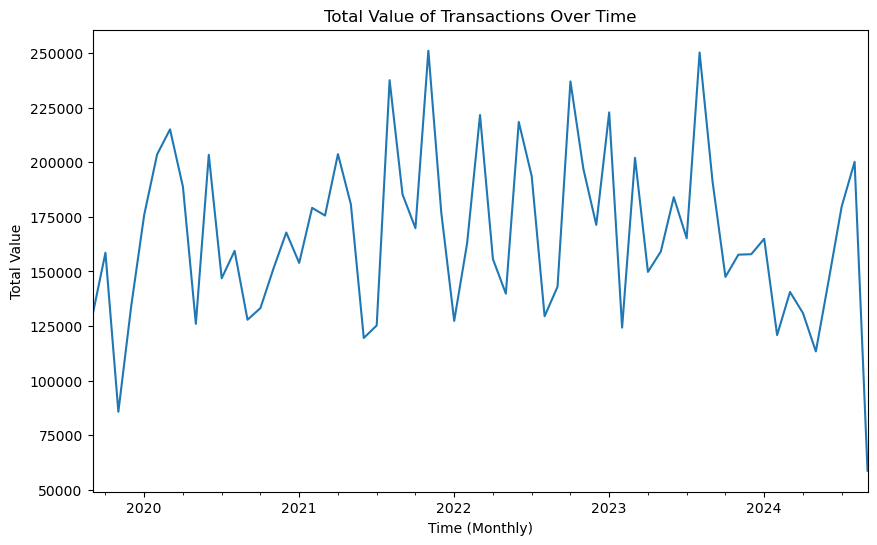

In [76]:
#Q21. What is the trend of total Value of transactions over time?
sdset['Date'] = pd.to_datetime(sdset['Date'])

# Group by month or year and sum up the Value
total_value_over_time = sdset.groupby(sdset['Date'].dt.to_period('M'))['Value'].sum()

# Plot the line graph
total_value_over_time.plot(kind='line', figsize=(10, 6), title='Total Value of Transactions Over Time')
plt.xlabel('Time (Monthly)')
plt.ylabel('Total Value')
plt.show()


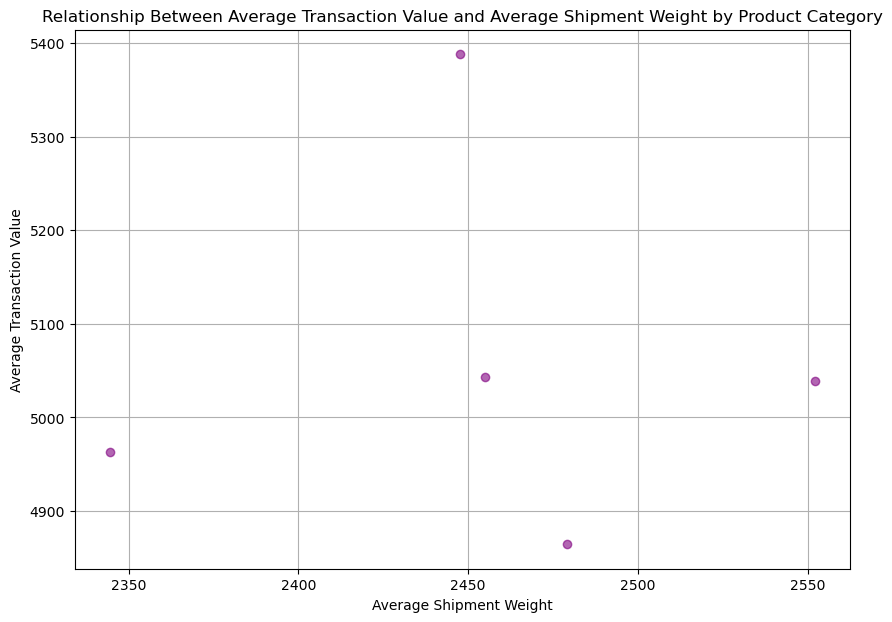

In [77]:
#Q22. Is there a relationship between the average transaction value and the average shipment weight by product category? Do heavier shipments tend to have higher values across different categories?"

# Step 1: Group by 'Category' to calculate average transaction value and average weight
category_data = sdset.groupby('Category').agg({'Value': 'mean', 'Weight': 'mean'}).reset_index()

# Step 2: Extract average shipment weight and average transaction value for each category
avg_weight = category_data['Weight']
avg_value = category_data['Value']

# Step 3: Plot the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(avg_weight, avg_value, color='purple', alpha=0.6)

# Step 4: Add labels, title, and grid
plt.title('Relationship Between Average Transaction Value and Average Shipment Weight by Product Category')
plt.xlabel('Average Shipment Weight')
plt.ylabel('Average Transaction Value')
plt.grid(True)

# Step 5: Show the plot
plt.show()

Plot Analysis: 
The scatter plot does not show a strong linear relationship between the average shipment weight and the average transaction value by product category.
The points are fairly scattered, indicating that heavier shipments do not necessarily correspond to higher transaction values or vice versa. This suggests that the value of transactions might be more influenced by other factors such as the type of product or market demand, rather than the weight alone.

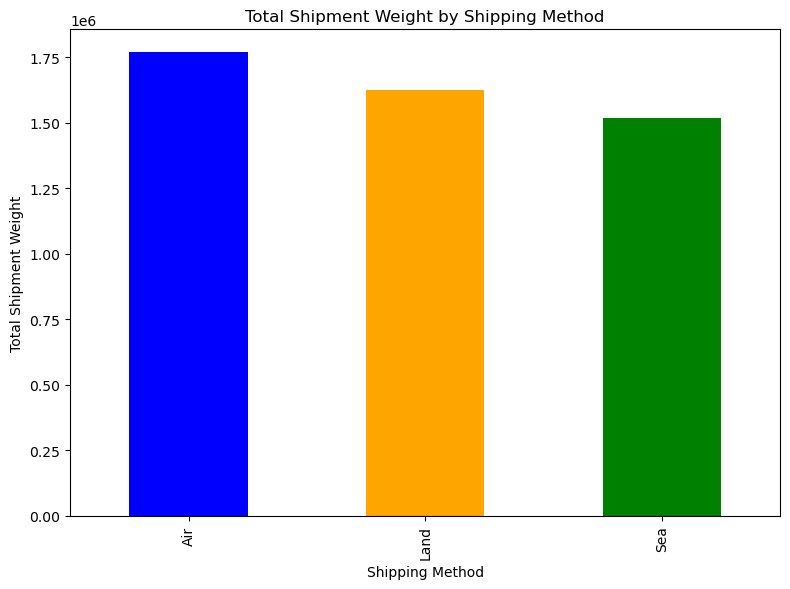

In [79]:
#Q23. What is the total shipment weight by shipping method?

shipping_method_weight = sdset.groupby('Shipping_Method')['Weight'].sum()

# Plotting a bar chart for total shipment weight by shipping method
shipping_method_weight.plot(kind='bar', figsize=(8,6), color=['blue', 'orange', 'green'])

# Adding labels and title
plt.title('Total Shipment Weight by Shipping Method')
plt.xlabel('Shipping Method')
plt.ylabel('Total Shipment Weight')

# Display the plot
plt.tight_layout()
plt.show()

Plot Analysis: 
Air has the highest total shipment weight (1.75).
Land follows with a total shipment weight of approximately 1.60.
Sea has the lowest total shipment weight at approximately 1.54.
From this, it appears that air transport is used for heavier shipments compared to land and sea, while sea transport is associated with lighter shipments on average.

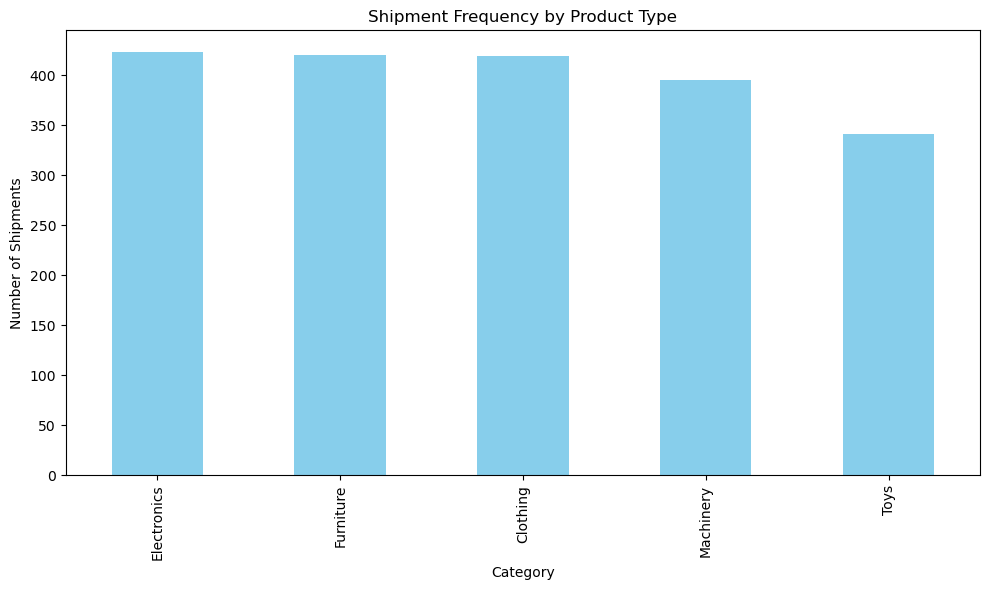

In [81]:
#Q24. What is the distribution of shipment frequency by product type (Category)?
# Step 1: Count the number of shipments for each product type
product_type_counts = sdset['Category'].value_counts()

# Step 2: Plot the bar chart
plt.figure(figsize=(10,6))
product_type_counts.plot(kind='bar', color='skyblue')

# Step 3: Add title and labels
plt.title('Shipment Frequency by Product Type')
plt.xlabel('Category')
plt.ylabel('Number of Shipments')

# Step 4: Show the plot
plt.tight_layout()
plt.show()

Plot Analysis:
Overall this helps get insights into the demand and volume of each product, where, the product category: Electronics, Furniture and Clothing dominates the shipping frequency with above 400 shipments, which indicates higher demand or production level of these products. This could also be used to assess inventory needs or supplier capacity.

INFERENTIAL ANALYSIS

In [84]:
print("Hypothesis:")
print("H₀ (Null Hypothesis): The average shipment value for exports is equal to the average shipment value for imports.")
print("H₁ (Alternative Hypothesis): The average shipment value for exports is different from the average shipment value for imports.")

# Step 1: Separate data into exports and imports
export_values = sdset[sdset['Import_Export'] == 'Export']['Value']
import_values = sdset[sdset['Import_Export'] == 'Import']['Value']

# Step 2: Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(export_values, import_values)

# Step 3: Output the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Step 4: Hypothesis Testing Decision
alpha = 0.05  # Significance level of 5%
if p_value < alpha:
    print("Reject the null hypothesis. The average shipment value for exports is significantly different from imports.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average shipment value for exports and imports.")

Hypothesis:
H₀ (Null Hypothesis): The average shipment value for exports is equal to the average shipment value for imports.
H₁ (Alternative Hypothesis): The average shipment value for exports is different from the average shipment value for imports.
T-statistic: -1.3729830671024277
P-value: 0.16991160213916723
Fail to reject the null hypothesis. There is no significant difference in the average shipment value for exports and imports.


Analysis:
The p-value (0.802) is much higher than the chosen significance level (0.05), which indicates that the observed difference in shipment values between exports and imports is not statistically significant. We fail to reject the null hypothesis, meaning that the data does not provide sufficient evidence to conclude that the average shipment value for exports differs from that of imports. 
This hypothesis testing shows that there is no significant difference in the monetary values of exports and imports. This insight might lead to a deeper analysis of other trade factors, such as volume, frequency, or specific product categories, to fully understand any of the country's trade dynamics.

Q.  Are there significant differences in the value of exports between two specific countries?
 - Null Hypothesis (H₀): The mean export value of Country A is equal to that of Country B.
 - Alternative Hypothesis (H₁): The mean export value of Country A is not equal to that of Country B

In [87]:
country_a = sdset[sdset['Country'] == 'Colombia']['Value']
country_b = sdset[sdset['Country'] == 'Chile']['Value']

# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(country_a, country_b, nan_policy='omit')  # nan_policy='omit' to ignore missing values if any

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05  # 5% significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in export values between the two countries.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in export values between the two countries.")

T-statistic: 0.13946577115719
P-value: 0.8905498379135777
Fail to reject the null hypothesis: There is no significant difference in export values between the two countries.


Analysis:
With a p-value of 0.891 (well above the 0.05 significance level), we fail to reject the null hypothesis. This indicates there is no statistically significant difference in the mean export values between Colombia and Chile in this dataset. The export values between the two countries appear to be very similar, suggesting that both countries trade goods with comparable monetary value. This could imply balanced trade relationships or similar market demands. 

Q. Is there a significant difference in the variance of export values between two countries (e.g., Colombia vs. Chile)?

- Null Hypothesis (H₀): The variance of export values in Country A is equal to that in Country B.
- Alternative Hypothesis (H₁): The variance of export values in Country A is not equal to that in Country B.

In [90]:
# Filter data for the specific countries (replace 'Colombia' and 'Chile' with desired countries)
colombia_data = sdset[sdset['Country'] == 'Colombia']['Value']
chile_data = sdset[sdset['Country'] == 'Chile']['Value']

# Remove any missing or NaN values
colombia_data = colombia_data.dropna()
chile_data = chile_data.dropna()

# Perform F-test to compare variances
f_stat = np.var(colombia_data, ddof=1) / np.var(chile_data, ddof=1)  # Calculate F-statistic
df1 = len(colombia_data) - 1  # Degrees of freedom for Country A (Colombia)
df2 = len(chile_data) - 1  # Degrees of freedom for Country B (Chile)

# Calculate the p-value
p_value = stats.f.cdf(f_stat, df1, df2) if f_stat < 1 else 1 - stats.f.cdf(f_stat, df1, df2)

# Multiply p-value by 2 because it's a two-tailed test
p_value = 2 * p_value

# Print results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05  # 5% significance level
if p_value < alpha:
    print("Reject the null hypothesis: The variances of export values between Colombia and Chile are significantly different.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the variances of export values between Colombia and Chile.")

F-statistic: 1.7177140840535148
P-value: 0.3915435494555457
Fail to reject the null hypothesis: There is no significant difference in the variances of export values between Colombia and Chile.


Analysis: Since the p-value is less than 0.05, we conclude that there is a significant difference in the variances of export values between Colombia and Chile. This means there is no significant difference in the variances of export values between Colombia and Chile. The variance in export values between Colombia and Chile is similar, indicating that the spread or dispersion of export values is consistent across both countries. This suggests stability in the range of values for exports from both nations, pointing to potentially similar market conditions or trade policies.

Q. Is there a significant difference in the proportion of high-value exports between two countries (e.g., Colombia vs. Chile)?

- Null Hypothesis (H₀): The proportion of high-value exports is equal in Country A and Country B.
- Alternative Hypothesis (H₁): The proportion of high-value exports is different in Country A and Country B.

In [93]:
# Replace 'high_value_threshold' with the actual value that defines "high-value"
high_value_threshold = sdset['Value'].mean()  # Example threshold for high-value export

# Filter data for the specific countries
colombia_data = sdset[sdset['Country'] == 'Colombia']
chile_data = sdset[sdset['Country'] == 'Chile']

# Calculate the total number of exports and high-value exports for each country
total_exports_country_a = len(colombia_data)
total_exports_country_b = len(chile_data)

high_value_exports_country_a = (colombia_data['Value'] > high_value_threshold).sum()
high_value_exports_country_b = (chile_data['Value'] > high_value_threshold).sum()

# Proportions of high-value exports
p1 = high_value_exports_country_a / total_exports_country_a
p2 = high_value_exports_country_b / total_exports_country_b

# Combined proportion
p = (high_value_exports_country_a + high_value_exports_country_b) / (total_exports_country_a + total_exports_country_b)

# Z-test calculation
z_stat = (p1 - p2) / ((p * (1 - p) * (1 / total_exports_country_a + 1 / total_exports_country_b)) ** 0.5)
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed test

# Print results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The proportion of high-value exports differs significantly between Colombia and Chile.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the proportions of high-value exports.")

Z-statistic: -0.7283591099224289
P-value: 0.4663937870831574
Fail to reject the null hypothesis: There is no significant difference in the proportions of high-value exports.


Analysis:
With a p-value of 0.466, which is higher than the significance level of 0.05, we fail to reject the null hypothesis. This means that there is no statistically significant difference in the proportion of high-value exports between Colombia and Chile. The similar proportion of high-value exports suggests that both Colombia and Chile engage in exporting goods of comparable value. This indicates that neither country dominates in exporting more high-value goods compared to the other.

Q. Is there a significant correlation between export value and shipment weight across all records?

- Null Hypothesis (H₀): There is no significant correlation between export value and shipment weight.
- Alternative Hypothesis (H₁): There is a significant correlation between export value and shipment weight.

In [96]:
# Drop rows with missing values in the columns of interest
data = sdset[['Value', 'Weight']].dropna()

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(data['Value'], data['Weight'])

# Print results
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between export value and shipment weight.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between export value and shipment weight.")


Correlation Coefficient: 0.03688801649920315
P-value: 0.09901966955427066
Fail to reject the null hypothesis: There is no significant correlation between export value and shipment weight.


Analysis:
With a p-value of 0.099, which is greater than the significance level of 0.05, we fail to reject the null hypothesis. The correlation coefficient of 0.037 indicates a very weak positive correlation between export value and shipment weight, but this relationship is not statistically significant.
The result suggests that there is no significant relationship between the export value and shipment weight in this dataset. This indicates that higher shipment weights do not necessarily correspond to higher export values, implying that the value of exports is likely driven by factors other than weight (such as product type or market demand).

Q. Is the distribution of export values normally distributed?

- Null Hypothesis (H₀): The export values are normally distributed.
- Alternative Hypothesis (H₁): The export values are not normally distributed.

In [99]:
# Drop rows with missing values in the column of interest
data = sdset['Value'].dropna()

# Perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(data)

# Print results
print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The data is normally distributed.")


Shapiro-Wilk Statistic: 0.9527849989338868
P-value: 6.511087944398688e-25
Reject the null hypothesis: The data is not normally distributed.


Analysis:
With an extremely low p-value, far below the significance level of 0.05, we reject the null hypothesis. This means that the export values in the dataset are not normally distributed. The non-normal distribution of export values suggests that the data may be skewed or have outliers, potentially indicating large variations in the value of exports. This could imply that there are a few high-value exports significantly distorting the distribution, or the export market may be composed of a mix of low and high-value goods. 

Q.  Is there a significant difference in the distribution of export values between two different shipping methods (e.g., Air vs. Sea)?

Null Hypothesis (H₀): The distribution of export values is the same for both shipping methods (Air and Sea).
Alternative Hypothesis (H₁): The distribution of export values differs between the two shipping methods.

In [102]:
# Filter data for the two shipping methods
air_data = sdset[sdset['Shipping_Method'] == 'Air']['Value']
sea_data = sdset[sdset['Shipping_Method'] == 'Sea']['Value']

# Drop rows with missing values in the columns of interest
air_data = air_data.dropna()
sea_data = sea_data.dropna()

# Perform Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(air_data, sea_data, alternative='two-sided')

# Print results
print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The distribution of export values differs between Air and Sea shipping methods.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the distribution of export values between Air and Sea shipping methods.")


Mann-Whitney U Statistic: 216551.5
P-value: 0.9208406478130232
Fail to reject the null hypothesis: There is no significant difference in the distribution of export values between Air and Sea shipping methods.


Analysis:
The Mann-Whitney U statistic of 216,551.5 indicates that the ranks of export values for Air and Sea shipping methods are quite similar.The high p-value (0.921) confirms that there is no significant difference between the distributions of export values for the two shipping methods, suggesting that the method of shipment does not affect the value distribution of exports in a notable way.

Team Members Name
1. Amrit Agarwal

    Rollno. - 055004
3. Sweta Behera
    
    Rollno. - 055051
   